<a href="https://colab.research.google.com/github/Danisorus/Data-Science-Projects/blob/main/Pandas_Practice_Project_with_practice_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import os


###Merging the 12 months of sales data into a single CSV file

In [13]:


files = [file for file in os.listdir("Pandas_Data_Science_Data/SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv("Pandas_Data_Science_Data/SalesAnalysis/Sales_Data/"+file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("Pandas_Data_Science_Data/Misc/all_data.csv", index=False)

In [14]:
all_data = pd.read_csv("Pandas_Data_Science_Data/Misc/all_data.csv")

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


##Clean up data

*drop rows of NaN*

In [28]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


###Find 'Or' and delete it

In [32]:
temp_df = all_data[all_data['Order Date'].str[0:2] != 'Or']   ## found all rows that started with 'Or'
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']  ##excludes rows that don't start with 'Or' and sets all_data to those rows

###Convert columns to the correct type

In [35]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


###Augment data with additional columns

###Task 2: Add month column

In [31]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


###Task 3: Add a 'Sales' column

In [36]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


###Question 1: What was the best month for sales? How much was earned that month?

In [38]:
results = all_data.groupby('Month').sum()

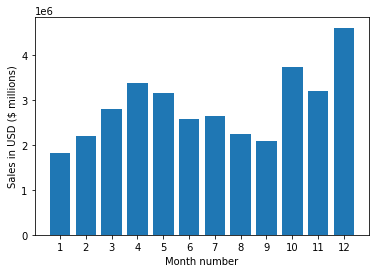

In [42]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($ millions)')
plt.xlabel('Month number')
plt.show()

###Question 2: What city had the highest number of sales?

###Task 4: Add a city column

In [53]:
# Using the .apply() method
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['Cities'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ',' + get_state(x))


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle,WA"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas,TX"
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,"Portland,OR"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles,CA"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,"New York City,NY"


In [55]:
results_2 = all_data.groupby('Cities').sum()
results_2

,Quantity Ordered,Price Each,Month,Sales
Cities,,,,
"Atlanta,GA",16602,2.779908e+06,104794,2.795499e+06
"Austin,TX",11153,1.809874e+06,69829,1.819582e+06
"Boston,MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas,TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles,CA",33289,5.421435e+06,208325,5.452571e+06
"New York City,NY",27932,4.635371e+06,175741,4.664317e+06
"Portland,ME",2750,4.471893e+05,17144,4.497583e+05
"Portland,OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco,CA",50239,8.211462e+06,315520,8.262204e+06


##Answer

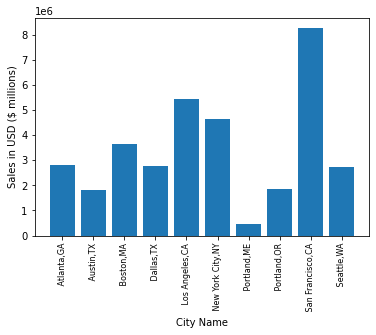

In [59]:
cities = [city for city, df in all_data.groupby('Cities')]

plt.bar(cities, results_2['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($ millions)')
plt.xlabel('City Name')
plt.show()

###Question 3: What time should we display advertisements to maximize likeihood of customer's buying product?

*convert column to a date/time column*

In [61]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

*add an hour and minutes column*

In [64]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle,WA",22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas,TX",15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,"Portland,OR",14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles,CA",20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,"New York City,NY",19,53


###Answer

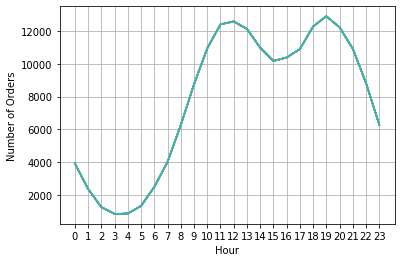

In [68]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#My reccomendation is around 11am (11) or 7pm (19)

###Question 4: What products are most often sold together?

In [69]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle,WA",22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas,TX",15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,"Portland,OR",14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles,CA",20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,"New York City,NY",19,53
